In [1]:
import numpy
import cv2 as cv
import matplotlib.pyplot as plt
import imageio

In [38]:
img1=cv.imread("Brick_Diffuse.jpg")
img2=cv.imread("Brick_Normal.jpg")
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
buff=[]
k=3
for i in range(k):
    alpha=i*1/k
    img=cv.addWeighted(img1,alpha,img2,(1-alpha),gamma=0)#应该不用改alpha值
    b.append(img)
    
b=[img1,img2]
gif=imageio.mimsave('yang.gif',b,'GIF',duration=1)


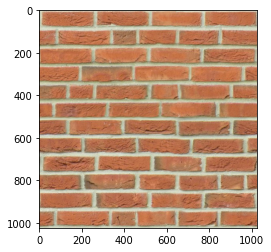

In [22]:
plt.imshow(img1)

In [35]:
def show(img):
    if img.ndim==2:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.show()


## 图像的裁剪

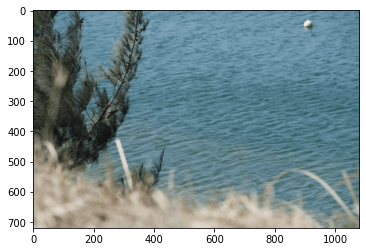

numpy.ndarray

In [17]:
test=cv.imread("test.png")#720 1080

show(test)

In [84]:
test=cv.imread("test.png")#720 1080
test=cv.cvtColor(test,cv.COLOR_BGR2RGB)
x1=300;
x2=500;
y1=500;
y2=800;
part=test[x1:x2,y1:y2,:]
a=test.copy()
mask=test[x1:x2,y1:y2,:]
buf=[test]

offset=5
for i in range(100):   
    last=a.copy()
    ran=numpy.random.rand(mask.shape)
    a[x1-i*1:x2-i*1,y1+i*2:y2+i*2,:]=mask
   # a[x1-i*1+ran:x2-i*1+ran,y1+i*2+ran:y2+i*2+ran,:]=mask
    tmp=a[x1-i*1-offset:x2-i*1+offset,y1+i*2-offset:y2+i*2+offset,:].copy()
    #模糊边缘
    g=cv.GaussianBlur(tmp,(offset,offset),2)
    
    a[x1-i*1-offset:x2-i*1+offset,y1+i*2-offset:y2+i*2+offset,:]=g
   
    buf.append(cv.addWeighted(last,0.1,a,0.9,0))
    a=test.copy()


gif=imageio.mimsave('test.gif',buf,'GIF',duration=0.1)


TypeError: 'tuple' object cannot be interpreted as an integer

In [74]:
import random

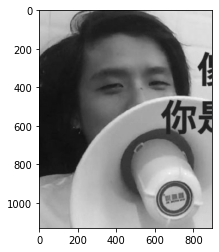

In [27]:
#全景拼接
img1=cv.imread("test1.png")
img2=cv.imread("test2.png")
#转化为灰度图
#gray1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(gray1,cmap="gray")#展示灰度图

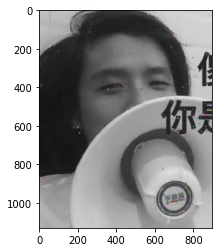

In [20]:
sift=cv.SIFT.create()
kp1=sift.detect(gray1,None)#得到关键点
kp_image1=cv.drawKeypoints(gray1,kp1,img1)#绘制出特征点（关键点）
show(kp_image1)

In [28]:
sift=cv.SIFT.create()
kp1,des1=sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)

bf=cv.BFMatcher(crossCheck=True)

In [29]:
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)

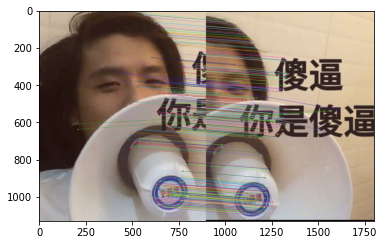

In [31]:
img3=cv.drawMatches(img1,kp1,img2,kp2,matches[:],None,flags=2)
show(img3)

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
class Stitcher:

    #拼接函数
    def stitch(self, images, ratio=0.75, reprojThresh=4.0,showMatches=False):
        #获取输入图片
        (imageB, imageA) = images
        #检测A、B图片的SIFT关键特征点，并计算特征描述子
        (kpsA, featuresA) = self.detectAndDescribe(imageA)
        (kpsB, featuresB) = self.detectAndDescribe(imageB)

        # 匹配两张图片的所有特征点，返回匹配结果
        M = self.matchKeypoints(kpsA, kpsB, featuresA, featuresB, ratio, reprojThresh)

        # 如果返回结果为空，没有匹配成功的特征点，退出算法
        if M is None:
            return None

        # 否则，提取匹配结果
        # H是3x3视角变换矩阵      
        (matches, H, status) = M
        # 将图片A进行视角变换，result是变换后图片
        result = cv.warpPerspective(imageA, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
       # self.cv_show('result', result)
        # 将图片B传入result图片最左端
        result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB
        #self.cv_show('result', result)
        # 检测是否需要显示图片匹配
        if showMatches:
            # 生成匹配图片
            vis = self.drawMatches(imageA, imageB, kpsA, kpsB, matches, status)
            # 返回结果
            return (result, vis)

        # 返回匹配结果
        return result
    def cv_show(self,name,img):
        cv.imshow(name, img)
        cv.waitKey(0)
        cv.destroyAllWindows()

    def detectAndDescribe(self, image):
        # 将彩色图片转换成灰度图
   #     gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
        # 建立SIFT生成器
        descriptor = cv.SIFT.create()
        # 检测SIFT特征点，并计算描述子
        (kps, features) = descriptor.detectAndCompute(image, None)

        # 将结果转换成NumPy数组
        kps = np.float32([kp.pt for kp in kps])

        # 返回特征点集，及对应的描述特征
        return (kps, features)

    def matchKeypoints(self, kpsA, kpsB, featuresA, featuresB, ratio, reprojThresh):
        # 建立暴力匹配器
        matcher = cv.BFMatcher()
  
        # 使用KNN检测来自A、B图的SIFT特征匹配对，K=2
        rawMatches = matcher.knnMatch(featuresA, featuresB, 2)

        matches = []
        for m in rawMatches:
            # 当最近距离跟次近距离的比值小于ratio值时，保留此匹配对
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
            # 存储两个点在featuresA, featuresB中的索引值
                matches.append((m[0].trainIdx, m[0].queryIdx))

        # 当筛选后的匹配对大于4时，计算视角变换矩阵
        if len(matches) > 4:
            # 获取匹配对的点坐标
            ptsA = np.float32([kpsA[i] for (_, i) in matches])
            ptsB = np.float32([kpsB[i] for (i, _) in matches])

            # 计算视角变换矩阵
            (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)

            # 返回结果
            return (matches, H, status)

        # 如果匹配对小于4时，返回None
        return None

    def drawMatches(self, imageA, imageB, kpsA, kpsB, matches, status):
        # 初始化可视化图片，将A、B图左右连接到一起
        (hA, wA) = imageA.shape[:2]
        (hB, wB) = imageB.shape[:2]
        vis = np.zeros((max(hA, hB), wA + wB, 3), dtype="uint8")
        vis[0:hA, 0:wA] = imageA
        vis[0:hB, wA:] = imageB

        # 联合遍历，画出匹配对
        for ((trainIdx, queryIdx), s) in zip(matches, status):
            # 当点对匹配成功时，画到可视化图上
            if s == 1:
                # 画出匹配对
                ptA = (int(kpsA[queryIdx][0]), int(kpsA[queryIdx][1]))
                ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
                cv.line(vis, ptA, ptB, (0, 255, 0), 1)

        # 返回可视化结果
        return vis

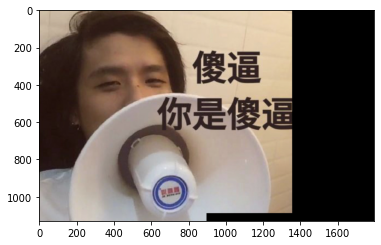

In [48]:
# 读取拼接图片
imageA = cv.imread("test1.png")
imageB = cv.imread("test2.png")
image=cv.resize(imageB,(imageA.shape[1],imageA.shape[0]),interpolation=cv.INTER_AREA)
#image=imageB.reshape(imageA.shape)
# 把图片拼接成全景图
stitcher = Stitcher()
(result, vis) = stitcher.stitch([imageA, image], showMatches=True)

# 显示所有图片
#show(vis)
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))
#plt.imshow("Image B", imageB)
#plt.imshow("Keypoint Matches", vis)
#plt.imshow("Result", result)
#plt.imshow(np.hstack(imageA,imageB,vis,result))

In [52]:
import imageio
test=cv.imread("test.png")#720 1080
test=cv.cvtColor(test,cv.COLOR_BGR2RGB)
x1=300;
x2=500;
y1=500;
y2=800;
part=test[x1:x2,y1:y2,:]
a=test.copy()
mask=test[x1:x2,y1:y2,:]
buf=[test]

stitcher = Stitcher()
m=cv.resize(mask,(a.shape[1],a.shape[0]),interpolation=cv.INTER_AREA)
for i in range(100):   
    last=a.copy()
    #a[x1-i*1:x2-i*1,y1+i*2:y2+i*2,:]=mask
    #将mask与a进行拼接   
    (result, vis) = stitcher.stitch([a, m], showMatches=True)
    buf.append(result)

   # buf.append(cv.addWeighted(last,0.1,a,0.9,0))
    a=test.copy()


gif=imageio.mimsave('test.gif',buf,'GIF',duration=0.1)



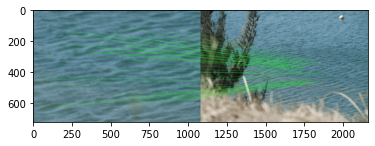

In [56]:
stitcher = Stitcher()
m=cv.resize(mask,(a.shape[1],a.shape[0]),interpolation=cv.INTER_AREA)
(result, vis) = stitcher.stitch([a, g], showMatches=True)
plt.imshow(vis)


# 会直接匹配到原位置上去怎么办？